# Quantium Virtual Internship
###### Milesh Bhadresa

## Task 1: Data preparation and Customer analytics

### Importing the required libraries

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind


### Importing the Purchasing behaviour Dataset

In [2]:
Purchase_behaviour=pd.read_csv('QVI_purchase_behaviour.csv')
Purchase_behaviour.shape


(72637, 3)

This indicates that there are 72637 rows and 3 columns.

### EDA on Purchasing behaviour Dataset

#### Checking for null values.

In [3]:
Purchase_behaviour.isnull().sum()


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

This indicates that there are no missing values to be addressed.

#### Finding the Unique values in the Purchase_behaviour dataset.

In [4]:
print("Aggregate\n", Purchase_behaviour.nunique(),'\n')
print("Lifestage\n", Purchase_behaviour['LIFESTAGE'].unique(),'\n')
print("Premium Customer\n", Purchase_behaviour['PREMIUM_CUSTOMER'].unique(),'\n')


Aggregate
 LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64 

Lifestage
 ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 

Premium Customer
 ['Premium' 'Mainstream' 'Budget'] 



There are 7 unique elements in the LIFESTAGE which can be used as categorical variables:
* YOUNG SINGLES/COUPLES
* YOUNG FAMILIES
* OLDER SINGLES/COUPLES
* MIDAGE SINGLES/COUPLES
* NEW FAMILIES
* OLDER FAMILIES
* RETIREES

There are 3 unique elements in the Premium Customer which can be used as categorical variables:
* Premium
* Mainstream
* Budget

### Importing the Transaction dataset

In [5]:
Transaction_data=pd.read_excel("QVI_transaction_data.xlsx")


In [6]:
print('The Transaction dataset contains', Transaction_data.shape[0],'rows and ', Transaction_data.shape[1],
      'Columns')


The Transaction dataset contains 264836 rows and  8 Columns


In [7]:
Transaction_data["ActualDate"]=pd.TimedeltaIndex(Transaction_data['DATE'],unit="d")+dt.datetime(1899,12,30)
Transaction_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ActualDate
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


### EDA on the Transaction dataset

#### Checking for Null values

In [8]:
Transaction_data.isnull().sum()


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
ActualDate        0
dtype: int64

This indicates that there are no Null values.

#### Finding the Unique values in the Transaction dataset 

In [9]:
Transaction_data.nunique()


DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
ActualDate           364
dtype: int64

In [10]:
Transaction_data['PROD_NAME']


0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

The above indicates that there are product weights included in the data set which may be at the end or in the middle. A further point to note is that some of the names have been abbreviated which could lead to having multiple codes for the same product. There also exists excessive white spaces.

In [11]:
np.sort(Transaction_data['PROD_QTY'].unique())


array([  1,   2,   3,   4,   5, 200])

There seems to be an outlier in the product quantity (200).

### Data Cleaning

#### Removing white spaces from PROD_NAME

In [12]:
Transaction_data['PROD_NAME']=Transaction_data['PROD_NAME'].str.replace(' ','')
Transaction_data['PROD_NAME']=Transaction_data['PROD_NAME'].str.replace('/','')
Transaction_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ActualDate
0,43390,1,1000,1,5,NaturalChipCompnySeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCsNachoCheese175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,SmithsCrinkleCutChipsChicken170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,SmithsChipThinlySCream&Onion175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,KettleTortillaChpsHny&JlpnoChili150g,3,13.8,2018-08-18


#### Extracting the Quantity from PROD_NAME

In [13]:
Transaction_data['PROD_WEIGHT']=Transaction_data['PROD_NAME'].str.extract('(\d+)')


#### Removing Special Characters, Digits and 'Salsa' from PROD_NAME

In [14]:
Transaction_data['PROD_NAME']=Transaction_data['PROD_NAME'].str.replace('(\d+g)|(&)',"")
Transaction_data=Transaction_data[~Transaction_data['PROD_NAME'].str.contains(('Salsa|salsa'),regex=True)]
Transaction_data["PROD_WEIGHT"]=Transaction_data["PROD_WEIGHT"].astype(float)
Transaction_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ActualDate,PROD_WEIGHT
0,43390,1,1000,1,5,NaturalChipCompnySeaSalt,2,6.0,2018-10-17,175.0
1,43599,1,1307,348,66,CCsNachoCheese,3,6.3,2019-05-14,175.0
2,43605,1,1343,383,61,SmithsCrinkleCutChipsChicken,2,2.9,2019-05-20,170.0
3,43329,2,2373,974,69,SmithsChipThinlySCreamOnion,5,15.0,2018-08-17,175.0
4,43330,2,2426,1038,108,KettleTortillaChpsHnyJlpnoChili,3,13.8,2018-08-18,150.0


#### Delete the Outlier in 'PROD_QTY'

In [15]:
Transaction_data=Transaction_data[Transaction_data['PROD_QTY']!=200]


### Frequency

#### PROD_NAME

In [16]:
Freq_PROD_NAME=Transaction_data['PROD_NAME'].value_counts()
Freq_PROD_NAME


KettleMozzarellaBasilPesto         3304
KettleTortillaChpsHnyJlpnoChili    3296
CobsPopdSwtChlliSrCreamChips       3269
TyrrellsCrispsChedChives           3268
CobsPopdSeaSaltChips               3265
                                   ... 
SunbitesWhlegrnCrispsFrchOnin      1432
RRDPcSeaSalt                       1431
NCCSourCreamGardenChives           1419
FrenchFriesPotatoChips             1418
WWCrinkleCutOriginal               1410
Name: PROD_NAME, Length: 105, dtype: int64

#### Loyalty card number

In [17]:
Freq_LYLTY_CARD_NBR=Transaction_data['LYLTY_CARD_NBR'].value_counts()
Freq_LYLTY_CARD_NBR


230078    17
162039    17
105026    16
116181    16
179228    16
          ..
17171      1
190138     1
149166     1
233111     1
47444      1
Name: LYLTY_CARD_NBR, Length: 71287, dtype: int64

#### Count per Date

In [18]:
Freq_Date=Transaction_data['ActualDate'].value_counts()
Freq_Date


2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: ActualDate, Length: 364, dtype: int64

#### Sequence of dates from 1 Jul 2018 to 30 Jun 2019

In [19]:
Date_seq=pd.date_range(start='7/1/2018',end='6/30/2019',freq="D")
Date_seq=pd.DataFrame({'Date':Date_seq})
Freq_Date=pd.DataFrame({'Count':Freq_Date})
Freq_Date.reset_index(inplace=True)
Freq_Date=Freq_Date.rename(columns={'index':"Date"})
Freq_Date


,Date,Count
0,2018-12-24,865
1,2018-12-23,853
2,2018-12-22,840
3,2018-12-19,839
4,2018-12-20,808
...,...,...
359,2019-06-24,612
360,2018-10-18,611
361,2018-11-25,610
362,2018-09-22,609


In [20]:
Missing_date=pd.merge(Freq_Date,Date_seq,how="right",on='Date').sort_values(by="Date")

Missing_date[Missing_date.isnull().any(axis=1)][['Date','Count']]


,Date,Count
364,2018-12-25,NaN


This shows us that the missing entry is on 25/12/2018. 

### Plot transactions over time

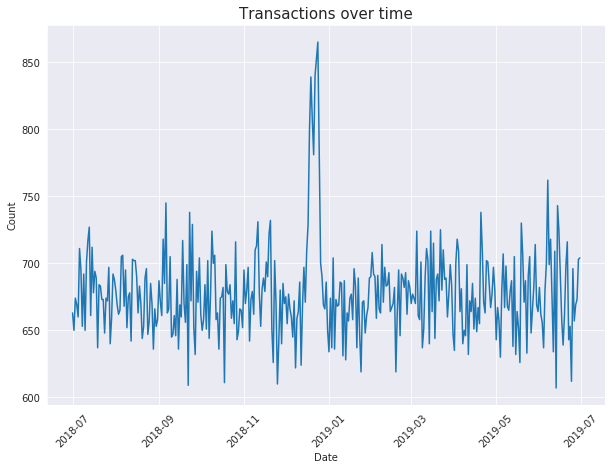

In [21]:
fig,ax=plt.subplots(figsize=(10,7))
fig=sns.lineplot('Date','Count',data=Missing_date).set_title("Transactions over time",fontsize=15)
x_dates=Missing_date["Date"].dt.strftime("%Y-%m-%d").sort_values().unique()
plt.xticks(rotation=45)
plt.show()


#### Zooming to December 2018

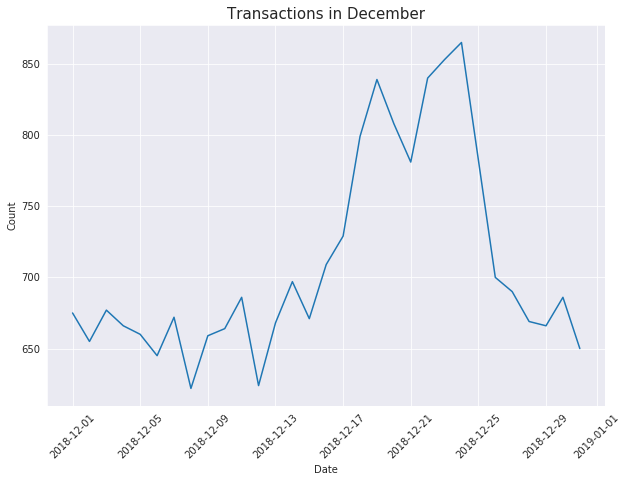

In [22]:
Dec_Missing_date=Missing_date[(Missing_date['Date']>'2018-11-30') & (Missing_date['Date']<'2019-1-1')]
fig,ax=plt.subplots(figsize=(10,7))
fig=sns.lineplot('Date','Count',data=Dec_Missing_date,palette="Blues_d").set_title("Transactions in December",fontsize=15)
plt.xticks(rotation=45)
plt.show()


#### Histogram of PACK_SIZE

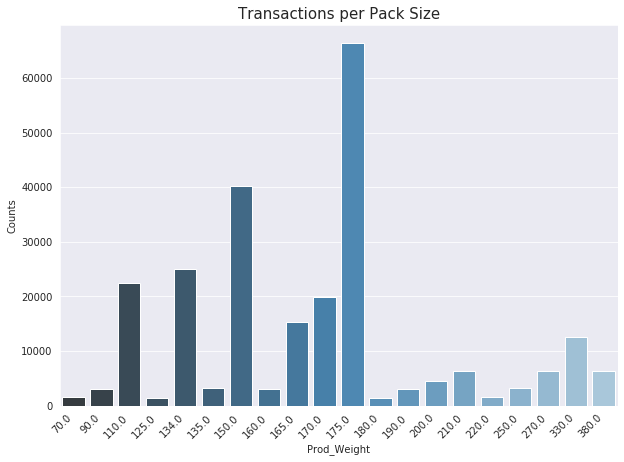

In [23]:
Prod_weight_counts=pd.DataFrame(Transaction_data['PROD_WEIGHT'].value_counts())
Prod_weight_counts.reset_index(inplace=True)
Prod_weight_counts=Prod_weight_counts.rename(columns={'index':'Prod_Weight','PROD_WEIGHT':'Counts'})
Prod_weight_counts=Prod_weight_counts.sort_values(by='Prod_Weight')
Prod_weight_counts

fig,ax=plt.subplots(figsize=(10,7))
fig=sns.barplot(Prod_weight_counts['Prod_Weight'],Prod_weight_counts['Counts'],palette="Blues_d").set_title("Transactions per Pack Size",fontsize=15)
ax.set_xticklabels(labels=Prod_weight_counts['Prod_Weight'],rotation=45,ha="right")
plt.show()


### Brands

#### Extracting the Brands using Regular Expressions

In [24]:
Transaction_data["Brand"]=Transaction_data['PROD_NAME'].str.extract('(^[A-Za-z]{3}[a-z]*)')
Transaction_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ActualDate,PROD_WEIGHT,Brand
0,43390,1,1000,1,5,NaturalChipCompnySeaSalt,2,6.0,2018-10-17,175.0,Natural
1,43599,1,1307,348,66,CCsNachoCheese,3,6.3,2019-05-14,175.0,CCs
2,43605,1,1343,383,61,SmithsCrinkleCutChipsChicken,2,2.9,2019-05-20,170.0,Smiths
3,43329,2,2373,974,69,SmithsChipThinlySCreamOnion,5,15.0,2018-08-17,175.0,Smiths
4,43330,2,2426,1038,108,KettleTortillaChpsHnyJlpnoChili,3,13.8,2018-08-18,150.0,Kettle


There are 32 unique brand names. However we need to consider error in data entry. For example we need to change:
* 'RRD' to 'Red'
* 'Infzns' to 'Infuzions'
* 'Snbts' to 'Sunbites'
* 'WWD' to 'WoolworthsDeli'
* 'Woolworths' to 'WoolworthsCheeseRings'
* 'GRN' to 'Grain'
* 'Smith' to 'Smiths'

In [25]:
Transaction_data["Brand"]=Transaction_data['Brand'].replace(['RRD','Infzns','Snbts','WWD','Woolworths','Grn','Smith'],['Red','Infuzions','Sunbites','WoolworthsDeli','WoolworthsCheeseRings','Grain','Smiths'])
Transaction_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ActualDate,PROD_WEIGHT,Brand
0,43390,1,1000,1,5,NaturalChipCompnySeaSalt,2,6.0,2018-10-17,175.0,Natural
1,43599,1,1307,348,66,CCsNachoCheese,3,6.3,2019-05-14,175.0,CCs
2,43605,1,1343,383,61,SmithsCrinkleCutChipsChicken,2,2.9,2019-05-20,170.0,Smiths
3,43329,2,2373,974,69,SmithsChipThinlySCreamOnion,5,15.0,2018-08-17,175.0,Smiths
4,43330,2,2426,1038,108,KettleTortillaChpsHnyJlpnoChili,3,13.8,2018-08-18,150.0,Kettle


## Merging the Purchase behaviour dataset and Transaction dataset

In [26]:
data=pd.merge(Transaction_data,Purchase_behaviour,how="left",on="LYLTY_CARD_NBR")
print(data.shape)
data.head()


(246740, 13)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,ActualDate,PROD_WEIGHT,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,NaturalChipCompnySeaSalt,2,6.0,2018-10-17,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCsNachoCheese,3,6.3,2019-05-14,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,SmithsCrinkleCutChipsChicken,2,2.9,2019-05-20,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,SmithsChipThinlySCreamOnion,5,15.0,2018-08-17,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,KettleTortillaChpsHnyJlpnoChili,3,13.8,2018-08-18,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [27]:
data.isnull().sum()


DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
ActualDate          0
PROD_WEIGHT         0
Brand               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

After merging the datasets, there are no null values present. There are 12 columns in the new merged dataset.

## Write to csv

In [28]:
data.to_csv("Data.csv",index=False)


## Chips bought by each Segment (Total Prod Qty)

In [29]:
Grouped_data=data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum().sort_values(by=["PREMIUM_CUSTOMER","PROD_QTY"],ascending=False)
Grouped_data=Grouped_data['PROD_QTY'].sort_values(ascending=False)
Grouped_data=Grouped_data.reset_index(inplace=False)
Grouped_data.head()

#Grouped_data[['LIFESTAGE','PREMIUM_CUSTOMER']]

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY
0,Budget,OLDER FAMILIES,41853
1,Mainstream,RETIREES,37677
2,Mainstream,YOUNG SINGLES/COUPLES,36225
3,Budget,YOUNG FAMILIES,34482
4,Budget,OLDER SINGLES/COUPLES,32883


#### Visualizing the data

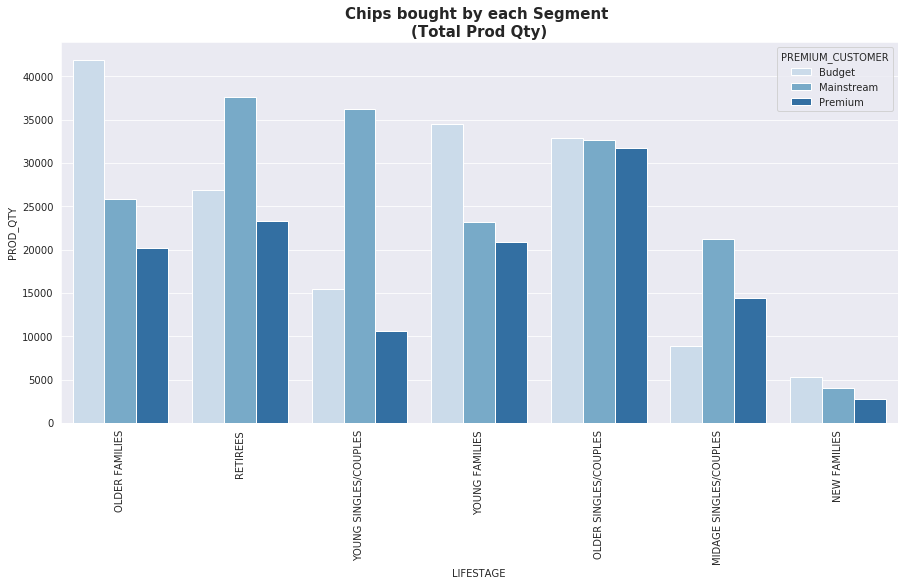

In [30]:
fig,ax=plt.subplots(figsize=(15,7))
sns.barplot(Grouped_data['LIFESTAGE'],Grouped_data['PROD_QTY'],palette="Blues",hue=Grouped_data['PREMIUM_CUSTOMER']).set_title('Chips bought by each Segment \n(Total Prod Qty)',fontsize=15,fontweight="bold")
plt.xticks(rotation=90)
plt.show()

/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]
/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


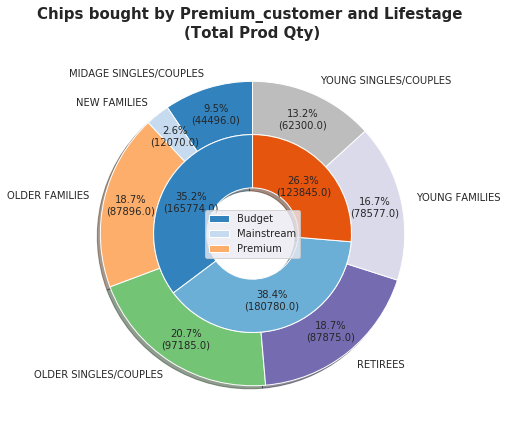

In [31]:
Lifestage=Grouped_data.groupby(['LIFESTAGE']).sum()
Premium_customer=Grouped_data.groupby(['PREMIUM_CUSTOMER']).sum()

def func(pct,allvals):
    absolute=float(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:.1f})".format(pct,absolute)

fig,ax=plt.subplots(figsize=(12,7))
size=0.35
cmap=plt.get_cmap("tab20c")
inner_colors=cmap(np.arange(7)**2)
outer_colors=cmap(np.arange(7)*3)
ax.pie(Lifestage,radius=1,labels=Lifestage.index,pctdistance=0.82,autopct=lambda pct: func(pct,Lifestage),colors=outer_colors,shadow=True,startangle=90,wedgeprops=dict(width=size,edgecolor='w'))
ax.pie(Premium_customer,radius=1-size,shadow=True,startangle=90,colors=inner_colors,pctdistance=0.7,autopct=lambda pct: func(pct,Premium_customer),wedgeprops=dict(width=size,edgecolor='w'))
ax.set(aspect="equal")
plt.title("Chips bought by Premium_customer and Lifestage \n(Total Prod Qty)",fontweight="bold",fontsize=15)
plt.legend(labels=Premium_customer.index,loc=10,fontsize=10)
plt.show()


#### Allocation of Lifestage

/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


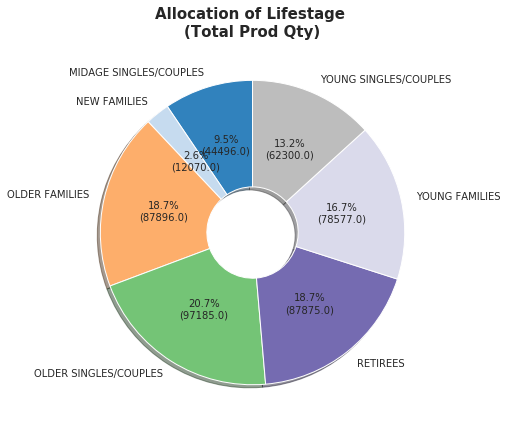

In [32]:
def func(pct,allvals):
    absolute=float(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:.1f})".format(pct,absolute)

fig,ax=plt.subplots(figsize=(12,7))
size=0.7
cmap=plt.get_cmap("tab20c")
inner_colors=cmap(np.arange(7)*3)
ax.pie(Lifestage,radius=1,colors=inner_colors,autopct=lambda pct: func(pct,Lifestage),labels=Lifestage.index,shadow=True,startangle=90,wedgeprops=dict(width=size,edgecolor='w'))
plt.title("Allocation of Lifestage \n(Total Prod Qty)",fontweight="bold",fontsize=15)
plt.show()


#### Allocation of Premium Customer

/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


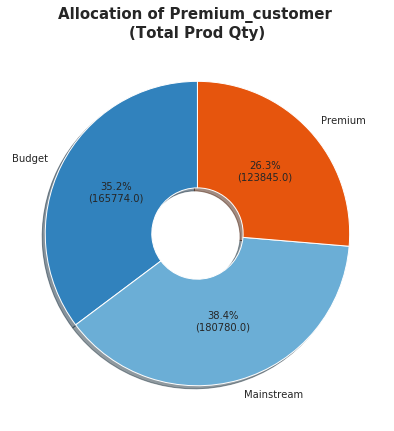

In [33]:
def func(pct,allvals):
    absolute=float(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:.1f})".format(pct,absolute)

autopct=lambda pct: func(pct,Premium_customer)

fig,ax=plt.subplots(figsize=(12,7))
size=0.7
cmap=plt.get_cmap("tab20c")
inner_colors=cmap(np.arange(7)**2)
ax.pie(Premium_customer,radius=1,labels=Premium_customer.index,colors=inner_colors,autopct=lambda pct: func(pct,Premium_customer),shadow=True,startangle=90,wedgeprops=dict(width=size,edgecolor='w'))
plt.title("Allocation of Premium_customer \n(Total Prod Qty)",fontweight="bold",fontsize=15)
plt.show()


## Total Sales by LIFESTAGE and PREMIUM_CUSTOMER

In [34]:
Grouped_data=data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum().sort_values(by=["PREMIUM_CUSTOMER","TOT_SALES"],ascending=False)
Grouped_data=Grouped_data['TOT_SALES'].sort_values(ascending=False)
Grouped_data=Grouped_data.reset_index(inplace=False)
Grouped_data.head()


,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES
0,Budget,OLDER FAMILIES,156863.75
1,Mainstream,YOUNG SINGLES/COUPLES,147582.20
2,Mainstream,RETIREES,145168.95
3,Budget,YOUNG FAMILIES,129717.95
4,Budget,OLDER SINGLES/COUPLES,127833.60


#### Visualizing the data

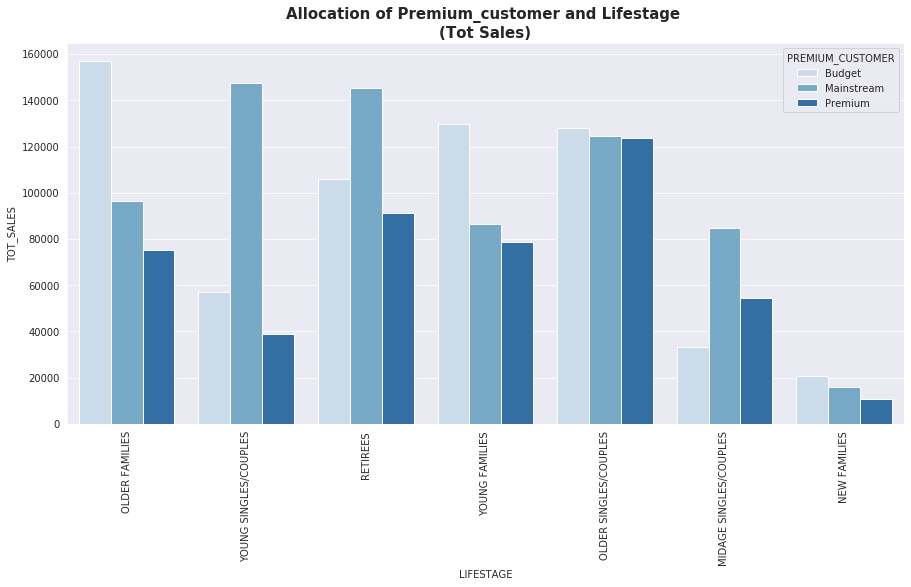

In [35]:
fig,ax=plt.subplots(figsize=(15,7))
sns.barplot(Grouped_data['LIFESTAGE'],Grouped_data['TOT_SALES'],palette="Blues",hue=Grouped_data['PREMIUM_CUSTOMER']).set_title('Allocation of Premium_customer and Lifestage \n(Tot Sales)',fontsize=15,fontweight="bold")
plt.xticks(rotation=90)

plt.show()

/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app


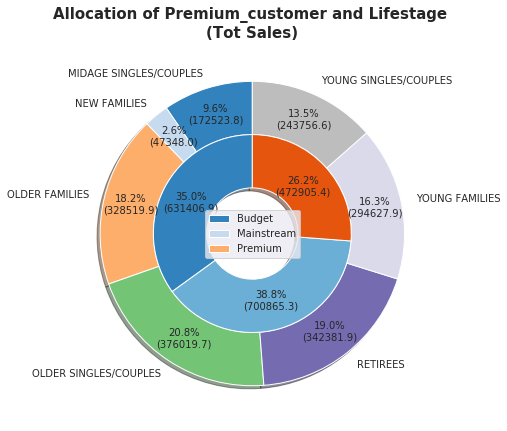

In [36]:
Lifestage=Grouped_data.groupby(['LIFESTAGE']).sum()
Premium_customer=Grouped_data.groupby(['PREMIUM_CUSTOMER']).sum()

def func(pct,allvals):
    absolute=float(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:.1f})".format(pct,absolute)


fig,ax=plt.subplots(figsize=(12,7))
size=0.35
cmap=plt.get_cmap("tab20c")
inner_colors=cmap(np.arange(7)**2)
outer_colors=cmap(np.arange(7)*3)
ax.pie(Lifestage,radius=1,labels=Lifestage.index,pctdistance=0.82,autopct=lambda pct: func(pct,Lifestage),colors=outer_colors,shadow=True,startangle=90,wedgeprops=dict(width=size,edgecolor='w'))
ax.pie(Premium_customer,radius=1-size,shadow=True,startangle=90,colors=inner_colors,pctdistance=0.7,autopct=lambda pct: func(pct,Premium_customer),wedgeprops=dict(width=size,edgecolor='w'))
ax.set(aspect="equal")
plt.title("Allocation of Premium_customer and Lifestage \n(Tot Sales)",fontweight="bold",fontsize=15)
plt.legend(labels=Premium_customer.index,loc=10,fontsize=10)
plt.show()


#### Allocation of Lifestage

/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


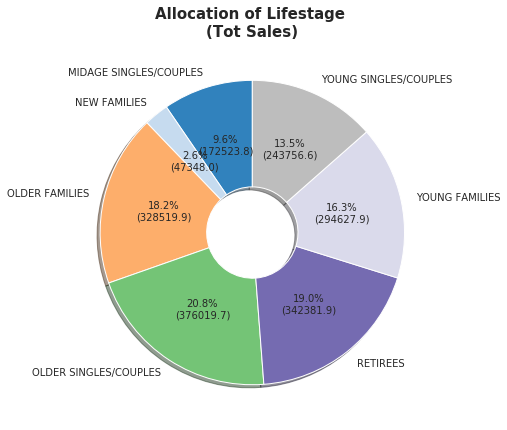

In [37]:
def func(pct,allvals):
    absolute=float(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:.1f})".format(pct,absolute)

fig,ax=plt.subplots(figsize=(12,7))
size=0.7
cmap=plt.get_cmap("tab20c")
inner_colors=cmap(np.arange(7)*3)
ax.pie(Lifestage,radius=1,colors=inner_colors,autopct=lambda pct: func(pct,Lifestage),labels=Lifestage.index,shadow=True,startangle=90,wedgeprops=dict(width=size,edgecolor='w'))
plt.title("Allocation of Lifestage \n(Tot Sales)",fontweight="bold",fontsize=15)
plt.show()


#### Allocation of Premium Customer

/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


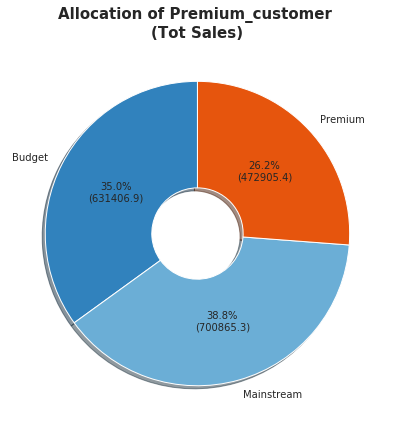

In [38]:
def func(pct,allvals):
    absolute=float(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:.1f})".format(pct,absolute)

autopct=lambda pct: func(pct,Premium_customer)

fig,ax=plt.subplots(figsize=(12,7))
size=0.7
cmap=plt.get_cmap("tab20c")
inner_colors=cmap(np.arange(7)**2)
ax.pie(Premium_customer,radius=1,labels=Premium_customer.index,colors=inner_colors,autopct=lambda pct: func(pct,Premium_customer),shadow=True,startangle=90,wedgeprops=dict(width=size,edgecolor='w'))
plt.title("Allocation of Premium_customer \n(Tot Sales)",fontweight="bold",fontsize=15)
plt.show()


## Average Price per product by LIFESTAGE and PREMIUM_CUSTOMER

#### Average Product Quantity

In [39]:
Grouped_data_mean=data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).mean().sort_values(by=["PREMIUM_CUSTOMER","PROD_QTY"],ascending=False)
Grouped_data_mean=Grouped_data_mean['PROD_QTY'].sort_values(ascending=False)
Grouped_data_mean=Grouped_data_mean.reset_index(inplace=False)
Grouped_data_mean.head()


,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY
0,Mainstream,OLDER FAMILIES,1.948795
1,Premium,OLDER FAMILIES,1.945496
2,Budget,OLDER FAMILIES,1.945384
3,Mainstream,YOUNG FAMILIES,1.941408
4,Budget,YOUNG FAMILIES,1.941226


#### Average price per product

In [40]:
Grouped_data_AvgPrice=data
Grouped_data_AvgPrice['UnitPrice']=Grouped_data_AvgPrice['TOT_SALES']/Grouped_data_AvgPrice['PROD_QTY']

Grouped_data_AvgPrice=Grouped_data_AvgPrice.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).mean().sort_values(by=["PREMIUM_CUSTOMER","UnitPrice"],ascending=False)
Grouped_data_AvgPrice=Grouped_data_AvgPrice['UnitPrice'].sort_values(ascending=False)
Grouped_data_AvgPrice=Grouped_data_AvgPrice.reset_index(inplace=False)
Grouped_data_AvgPrice.head()


,PREMIUM_CUSTOMER,LIFESTAGE,UnitPrice
0,Mainstream,YOUNG SINGLES/COUPLES,4.065642
1,Mainstream,MIDAGE SINGLES/COUPLES,3.994241
2,Budget,RETIREES,3.924404
3,Premium,RETIREES,3.920942
4,Budget,NEW FAMILIES,3.917688


#### Visualizing the data

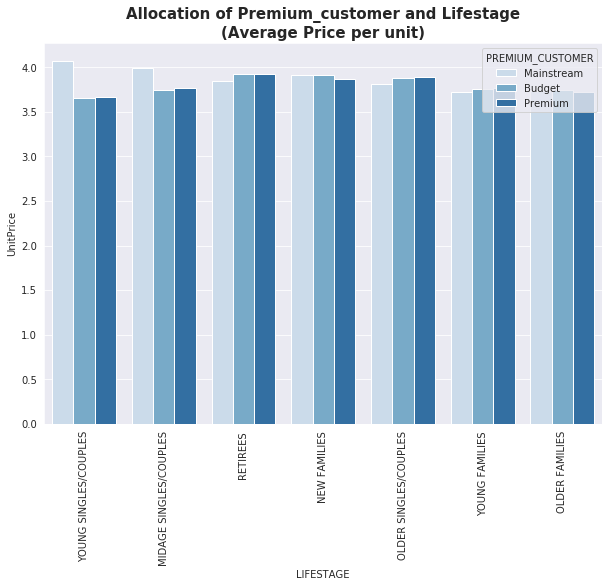

In [41]:
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(Grouped_data_AvgPrice['LIFESTAGE'],Grouped_data_AvgPrice['UnitPrice'],palette="Blues",hue=Grouped_data_AvgPrice['PREMIUM_CUSTOMER']).set_title('Allocation of Premium_customer and Lifestage\n(Average Price per unit)',fontsize=15,fontweight="bold")
plt.xticks(rotation=90)

plt.show()

/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


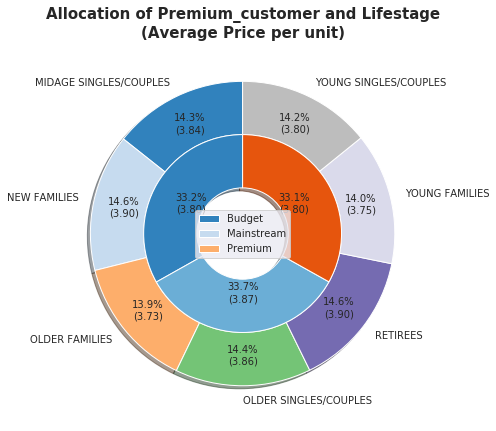

                        UnitPrice
LIFESTAGE                        
MIDAGE SINGLES/COUPLES   3.836089
NEW FAMILIES             3.901977
OLDER FAMILIES           3.733139
OLDER SINGLES/COUPLES    3.863314
RETIREES                 3.896547
YOUNG FAMILIES           3.749140
YOUNG SINGLES/COUPLES    3.796140
                  UnitPrice
PREMIUM_CUSTOMER           
Budget             3.804423
Mainstream         3.870941
Premium            3.800214


In [42]:
def func(pct,allvals):
    absolute=float(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:.2f})".format(pct,absolute)

autopct=lambda pct: func(pct,Premium_customer)



Lifestage=Grouped_data_AvgPrice.groupby(['LIFESTAGE']).mean()
Premium_customer=Grouped_data_AvgPrice.groupby(['PREMIUM_CUSTOMER']).mean()

fig,ax=plt.subplots(figsize=(12,7))
size=0.35
cmap=plt.get_cmap("tab20c")
inner_colors=cmap(np.arange(7)**2)
outer_colors=cmap(np.arange(7)*3)
ax.pie(Lifestage,radius=1,labels=Lifestage.index,pctdistance=0.8,autopct=lambda pct: func(pct,Lifestage),colors=outer_colors,shadow=True,startangle=90,wedgeprops=dict(width=size,edgecolor='w'))
ax.pie(Premium_customer,radius=1-size,shadow=True,startangle=90,colors=inner_colors,autopct=lambda pct: func(pct,Premium_customer),wedgeprops=dict(width=size,edgecolor='w'))
ax.set(aspect="equal")
plt.title("Allocation of Premium_customer and Lifestage\n(Average Price per unit)",fontweight="bold",fontsize=15)
plt.legend(labels=Premium_customer.index,loc=10,fontsize=10)
plt.show()
print(Lifestage)
print(Premium_customer)

#### Allocation of LIFESTYLE: Average Price per Unit

/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


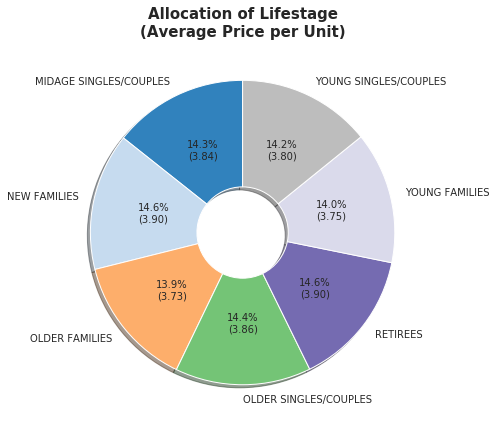

In [43]:
def func(pct,allvals):
    absolute=float(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:.2f})".format(pct,absolute)

fig,ax=plt.subplots(figsize=(12,7))
size=0.7
cmap=plt.get_cmap("tab20c")
inner_colors=cmap(np.arange(7)*3)
ax.pie(Lifestage,radius=1,colors=inner_colors,autopct=lambda pct: func(pct,Lifestage),labels=Lifestage.index,shadow=True,startangle=90,wedgeprops=dict(width=size,edgecolor='w'))
plt.title("Allocation of Lifestage\n(Average Price per Unit)",fontweight="bold",fontsize=15)
plt.show()


#### Allocation of PREMIUM customer: Average Price per Unit

/home/altec/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


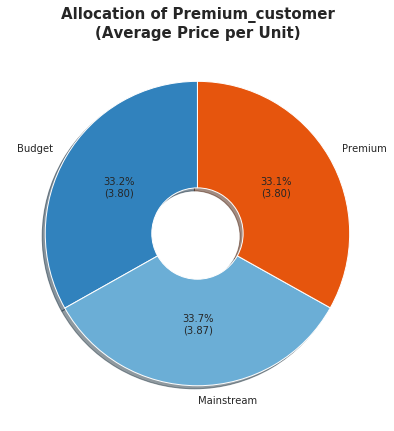

In [44]:
def func(pct,allvals):
    absolute=float(pct/100*np.sum(allvals))
    return "{:.1f}%\n({:.2f})".format(pct,absolute)


fig,ax=plt.subplots(figsize=(12,7))
size=0.7
cmap=plt.get_cmap("tab20c")
inner_colors=cmap(np.arange(7)**2)
ax.pie(Premium_customer,radius=1,labels=Premium_customer.index,colors=inner_colors,autopct=lambda pct: func(pct,Premium_customer),shadow=True,startangle=90,wedgeprops=dict(width=size,edgecolor='w'))
plt.title("Allocation of Premium_customer\n(Average Price per Unit)",fontweight="bold",fontsize=15)
plt.show()


#### Testing for statistical differences

In [45]:
#Mainstream
a=Grouped_data_AvgPrice[(Grouped_data_AvgPrice['PREMIUM_CUSTOMER']=="Mainstream")&(Grouped_data_AvgPrice['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')]
b=Grouped_data_AvgPrice[(Grouped_data_AvgPrice['PREMIUM_CUSTOMER']=="Mainstream")&(Grouped_data_AvgPrice['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
main=pd.concat([a,b],axis=0)

#Premium
a=Grouped_data_AvgPrice[(Grouped_data_AvgPrice['PREMIUM_CUSTOMER']=="Premium")&(Grouped_data_AvgPrice['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')]
b=Grouped_data_AvgPrice[(Grouped_data_AvgPrice['PREMIUM_CUSTOMER']=="Premium")&(Grouped_data_AvgPrice['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
premium=pd.concat([a,b],axis=0)

#Budget
a=Grouped_data_AvgPrice[(Grouped_data_AvgPrice['PREMIUM_CUSTOMER']=="Budget")&(Grouped_data_AvgPrice['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')]
b=Grouped_data_AvgPrice[(Grouped_data_AvgPrice['PREMIUM_CUSTOMER']=="Budget")&(Grouped_data_AvgPrice['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
budget=pd.concat([a,b],axis=0)


#### Testing the Hypothesis

The problem formulation is:

$H_0:\mu_{mainstream}=\mu_{premium} \:$ vs $H_1:\mu_{mainstream}\neq\mu_{premium}$ Given $\alpha=5\%$

And it will be 2 sided test as we want to know whether the two populations are different from each other.

In [46]:
ttest_ind(main['UnitPrice'],premium['UnitPrice'])


Ttest_indResult(statistic=4.903408142315233, pvalue=0.039164350623318175)

The problem formulation is:

$H_0:\mu_{mainstream}=\mu_{budget} \:$ vs $H_1:\mu_{mainstream}\neq\mu_{budget}$ Given $\alpha=5\%$

And it will be 2 sided test as we want to know whether the two populations are different from each other.

In [47]:
ttest_ind(main['UnitPrice'],budget['UnitPrice'])


Ttest_indResult(statistic=5.898916083930586, pvalue=0.02755562902851451)

The results are:
* Pvalue of 0.03916 for the 1st test.
* Pvalue of 0.02755 for the 2nd test.

As both Pvalues are less than 5% we can reject the Null Hypothesis and conclude that the average unit price is different and therefore statistically significant. 


### Ranking of Brands and Pack size by Mainstream, young singles/couples

#### Favourite Brand

In [48]:
Manistream_brands=data[(data['PREMIUM_CUSTOMER']=="Mainstream")&(data['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]
plot=Manistream_brands['Brand'].value_counts(ascending=False)
plot=plot.reset_index(inplace=False)
plot=plot.rename(columns={'index':'Brand','Brand':'Counts'})
plot.head()


,Brand,Counts
0,Kettle,3844
1,Pringles,2315
2,Doritos,2076
3,Smiths,1921
4,Infuzions,1250


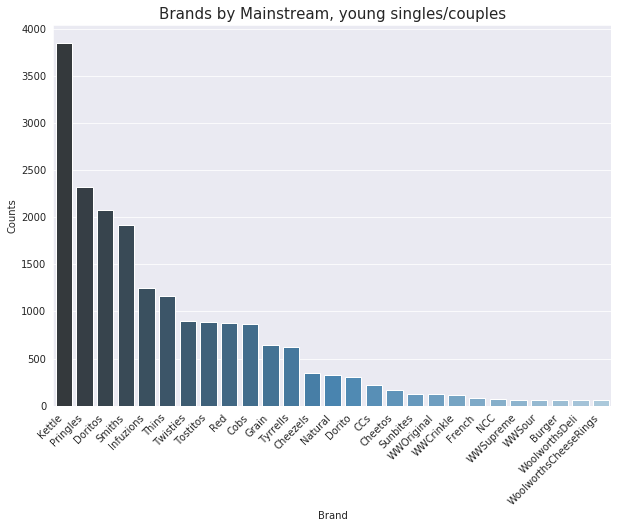

In [49]:

fig,ax=plt.subplots(figsize=(10,7))
fig=sns.barplot(x=plot['Brand'],y=plot['Counts'],palette="Blues_d").set_title("Brands by Mainstream, young singles/couples",fontsize=15)
ax.set_xticklabels(labels=plot['Brand'],rotation=45,ha="right")

plt.show()


#### Favourite Pack size

In [50]:
plot=Manistream_brands['PROD_WEIGHT'].value_counts(ascending=False)
plot=plot.reset_index(inplace=False)
plot=plot.rename(columns={'index':'Pack Size','PROD_WEIGHT':'Counts'})
plot=plot.sort_values(by="Pack Size",ascending=True)
plot.head()


,Pack Size,Counts
17,70.0,63
14,90.0,128
3,110.0,2051
19,125.0,59
2,134.0,2315


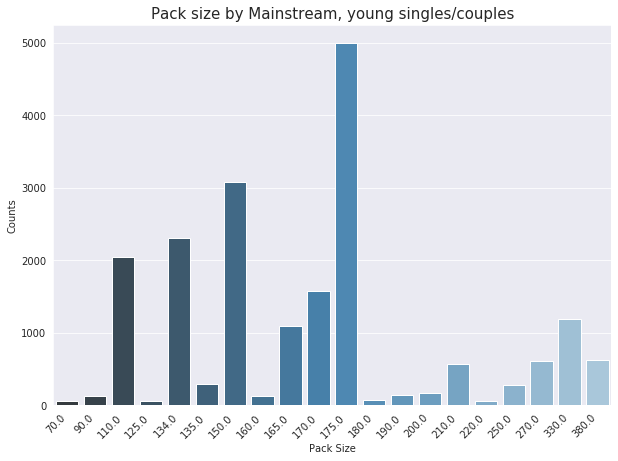

In [51]:

fig,ax=plt.subplots(figsize=(10,7))
fig=sns.barplot(x=plot['Pack Size'],y=plot['Counts'],palette="Blues_d").set_title("Pack size by Mainstream, young singles/couples",fontsize=15)
ax.set_xticklabels(labels=plot['Pack Size'],rotation=45,ha="right")

plt.show()
